Import Library

In [37]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [38]:
image_directory_training="../Dataset/augmentation_image/2_label/dataset_training"
image_directory_testing="../Dataset/augmentation_image/2_label/dataset_testing"

GLCM Atribut

In [39]:
#scenario GLCM properties
glcm_properties = ['dissimilarity', 'correlation', 'homogeneity']
# glcm_properties = ['dissimilarity', 'correlation', 'contrast']
# glcm_properties = ['dissimilarity', 'homogeneity', 'contrast']
# glcm_properties = ['correlation', 'homogeneity', 'contrast']
# glcm_properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast']
angles = [0, 45, 90, 135]
distance = [5]

Ekstraksi Fitur RGB + GLCM

In [40]:
def ef_rgb_glcm_training(image_directory_training):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_training = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format RGB
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # mengambil nilai red (R) dari gambar
            red = rgb[:, :, 0]

            # mengambil nilai green (G) dari gambar
            green = rgb[:, :, 1]

            # mengambil nilai blue (B) dari gambar
            blue = rgb[:, :, 2]
            
            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],levels=256, symmetric=True, normed=True)
            
            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_training.append([np.mean(red), np.mean(green), np.mean(blue)] + feature_glcm + [a])
            
    return features_training


def ef_rgb_glcm_testing(image_directory_testing):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_testing = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format RGB
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # mengambil nilai red (R) dari gambar
            red = rgb[:, :, 0]

            # mengambil nilai green (G) dari gambar
            green = rgb[:, :, 1]

            # mengambil nilai blue (B) dari gambar
            blue = rgb[:, :, 2]
            
            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_testing.append([np.mean(red), np.mean(
                green), np.mean(blue)] + feature_glcm + [a])

    return features_testing


Inisialisasi Data Training

In [41]:
#NORMALISASI DATA
extraction_feature = ef_rgb_glcm_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [42]:
# train_data = ef_rgb_glcm_training(image_directory_training)

In [43]:
# header tabel rgb glcm
header = ["Red (R)", "Green (G)", "Blue (B)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===========+=============+============+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|  0.583436 |    0.624456 |   0.518759 |        0.00941207 |         0.0124988  |         0.00948992 |          0.012278   |      0.0032183

Inisialisasi Data Testing

In [44]:
#NORMALISASI DATA
extraction_feature = ef_rgb_glcm_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [45]:
# test_data = ef_rgb_glcm_testing(image_directory_testing)

In [46]:
# header tabel rgb glcm
header = ["Red (R)", "Green (G)", "Blue (B)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===========+=============+============+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|  0.577042 |    0.622961 |   0.52744  |        0.0108306  |         0.0156179  |         0.0107997  |          0.0144382  |      0.0033284

Klasifikasi Model Naive Bayes

In [47]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [48]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [49]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 5, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [51]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel rgb glcm
header = ["Red (R)", "Green (G)", "Blue (B)"] + [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["True Label","Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-----------+-------------+------------+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+--------------+-----------------+
|   Red (R) |   Green (G) |   Blue (B) |   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   True Label |   Predict Label |
+===========+=============+============+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+==============+=================+
|  0.577042 |    0.622961 |   0.52744  |        0.0108306  |         0

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        32
           2       1.00      1.00      1.00        32
           3       0.75      0.75      0.75        32
           4       0.86      0.75      0.80        32
           5       0.78      0.88      0.82        32

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160



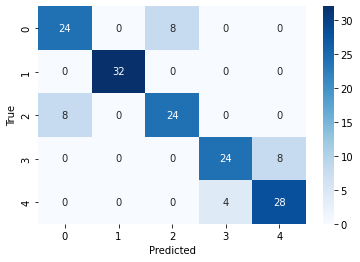

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.825
